# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd

In [4]:
data = pd.read_excel('geo_comment.xlsx')
data.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70382 entries, 0 to 70381
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     70382 non-null  int64  
 1   x              70382 non-null  float64
 2   y              70382 non-null  float64
 3   comment_class  70382 non-null  int64  
 4   multiplier     70382 non-null  int64  
 5   comment        70382 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 3.2+ MB


In [6]:
data.describe()

,Unnamed: 0,x,y,comment_class,multiplier
count,70382.00000,70382.000000,70382.000000,70382.000000,70382.000000
mean,35190.50000,37.588417,55.786013,-0.663835,1.545935
std,20317.67766,0.138217,0.066225,0.747885,16.986786
min,0.00000,37.148813,55.496939,-1.000000,1.000000
25%,17595.25000,37.445608,55.743558,-1.000000,1.000000
50%,35190.50000,37.570887,55.792331,-1.000000,1.000000
75%,52785.75000,37.702822,55.848665,-1.000000,1.000000
max,70381.00000,37.931228,55.994174,1.000000,1500.000000


In [7]:
data_geo = pd.read_excel('geo.xlsx')
data_geo.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [78]:
data_yes = data_geo[data_geo['comment_class']==1]
data_no = data_geo[data_geo['comment_class']==-1]

In [21]:
geo_x_y = data_geo[['x', 'y']]

In [8]:
import matplotlib.pyplot as plt

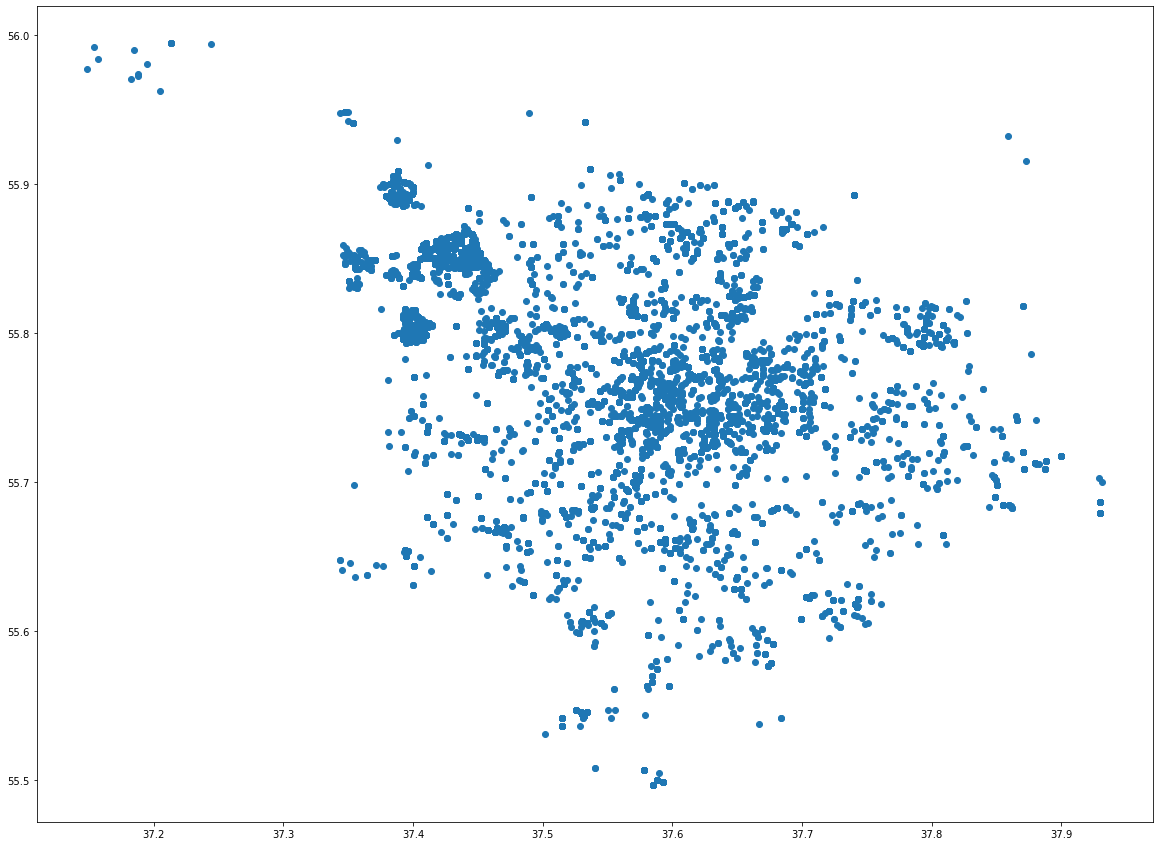

In [14]:
plt.figure(figsize=(20,15))
plt.scatter(data_geo.x, data_geo.y)


In [38]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score
import numpy as np

In [49]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [50]:
#  k means
data_geo['cluster'] = kmeans.fit_predict(data_geo[['x', 'y']])

In [51]:
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

In [53]:
## add to df
data_geo['cen_x'] = data_geo.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],
                                         3:cen_x[3], 4:cen_x[4]})
data_geo['cen_y'] = data_geo.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2], 
                                         3:cen_y[3], 4:cen_y[4]})

In [55]:
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#dfbc20', '#633945']
data_geo['c'] = data_geo.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4]})

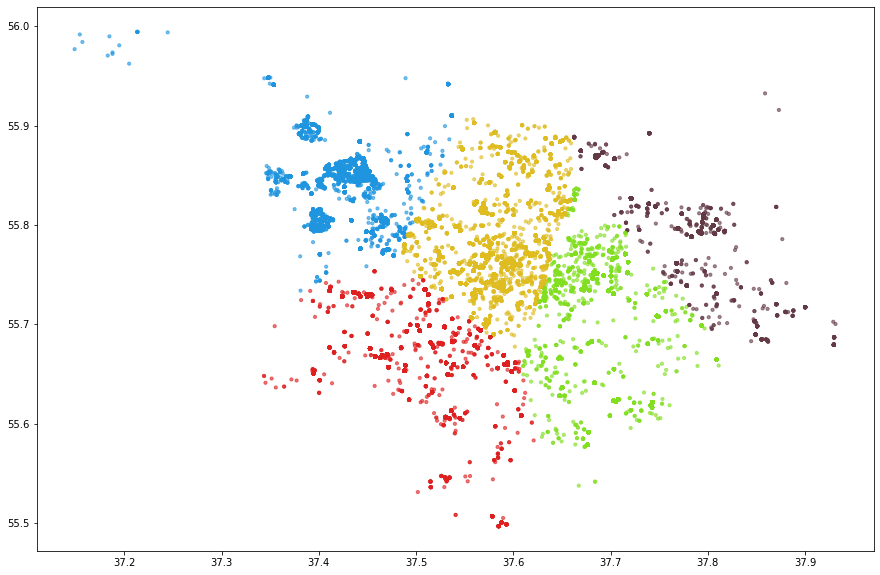

In [57]:
plt.figure(figsize=(15,10))
plt.scatter(data_geo.x, data_geo.y, c=data_geo.c, alpha = 0.6, s=10)

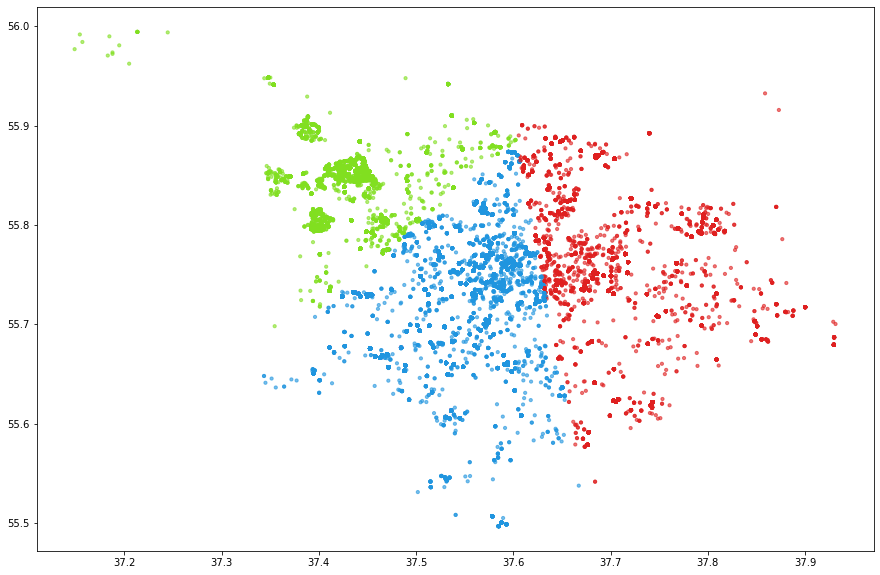

In [58]:
kmeans = KMeans(n_clusters=3, random_state=0)
#  k means
data_geo['cluster'] = kmeans.fit_predict(data_geo[['x', 'y']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
data_geo['cen_x'] = data_geo.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
data_geo['cen_y'] = data_geo.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
data_geo['c'] = data_geo.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.figure(figsize=(15,10))
plt.scatter(data_geo.x, data_geo.y, c=data_geo.c, alpha = 0.6, s=10)


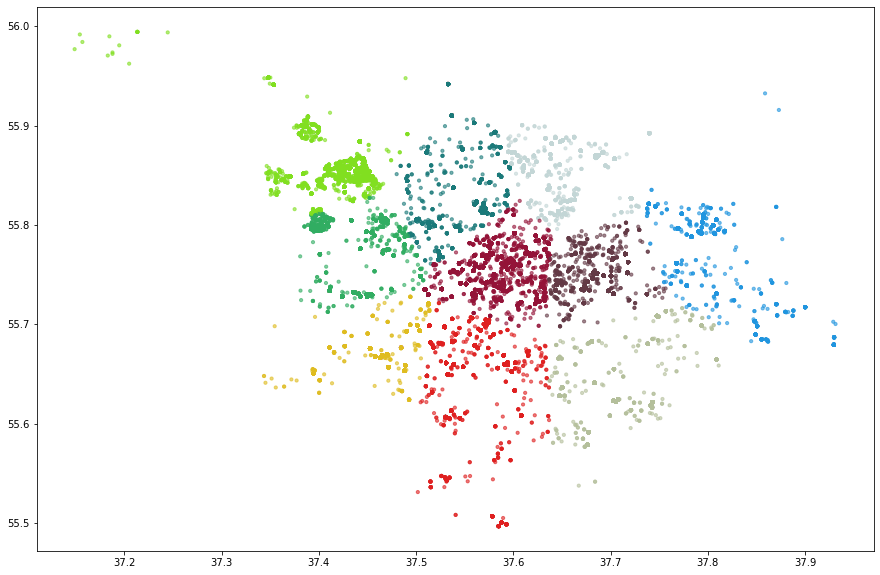

In [64]:
kmeans = KMeans(n_clusters=10, random_state=0)
#  k means
data_geo['cluster'] = kmeans.fit_predict(data_geo[['x', 'y']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
data_geo['cen_x'] = data_geo.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],
                                         3:cen_x[3], 4:cen_x[4], 5:cen_x[5], 6:cen_x[6],
                                         7:cen_x[7], 8:cen_x[8], 9:cen_x[9]})
data_geo['cen_y'] = data_geo.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2],
                                         3:cen_y[3], 4:cen_y[4], 5:cen_y[5], 6:cen_y[6],
                                         7:cen_y[7], 8:cen_y[8], 9:cen_y[9]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#dfbc20', '#633945', '#941338', '#1b7a7a', '#c3d6d6', '#31ad62', '#b4bf9b']
data_geo['c'] = data_geo.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 
                                     3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6], 
                                      7:colors[7], 8:colors[8], 9:colors[9]})

plt.figure(figsize=(15,10))
plt.scatter(data_geo.x, data_geo.y, c=data_geo.c, alpha = 0.6, s=10)


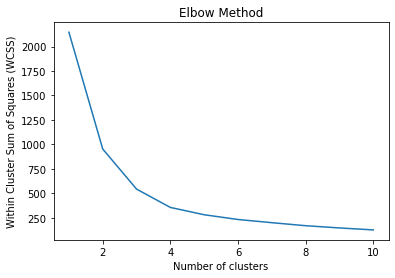

In [65]:
# Determine optimal cluster number with elbow method
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters = i,     
                    init = 'k-means++',                 # Initialization method for kmeans
                    max_iter = 300,                     # Maximum number of iterations 
                    n_init = 10,                        # Choose how often algorithm will run with different centroid 
                    random_state = 0)                   # Choose random state for reproducibility
    model.fit(geo_x_y)                              
    wcss.append(model.inertia_)
    
# Show Elbow plot
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')                               # Set plot title
plt.xlabel('Number of clusters')                        # Set x axis name
plt.ylabel('Within Cluster Sum of Squares (WCSS)')      # Set y axis name
plt.show()

In [72]:
diff = np.diff(wcss)
len(label)

108806

##### подобрать оптимальное число кластеров 

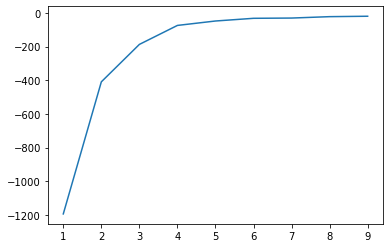

In [76]:
plt.plot(range(1, 10), diff)

##### показывает что 4 кластера являются оптимальными

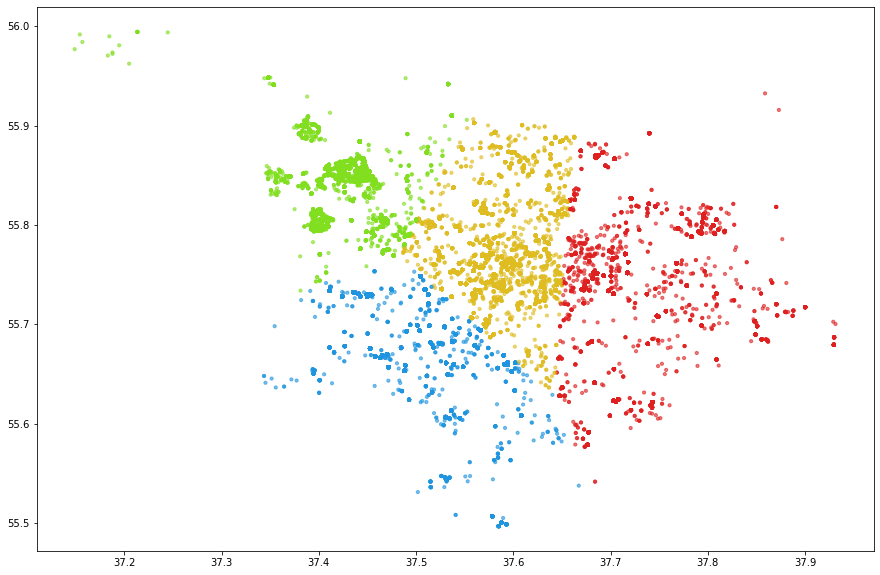

In [66]:
kmeans = KMeans(n_clusters=4, random_state=0)
#  k means
data_geo['cluster'] = kmeans.fit_predict(data_geo[['x', 'y']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
data_geo['cen_x'] = data_geo.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2],
                                         3:cen_x[3]})
data_geo['cen_y'] = data_geo.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2],
                                         3:cen_y[3]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF', '#dfbc20']
data_geo['c'] = data_geo.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 
                                     3:colors[3]})

plt.figure(figsize=(15,10))
plt.scatter(data_geo.x, data_geo.y, c=data_geo.c, alpha = 0.6, s=10)

In [80]:
label = kmeans.fit_predict(geo_x_y)
print(label)

[3 3 3 ... 1 1 1]


### визуально исследовать скопления голосов за и против отдельно

##### респоденты ответили ДА

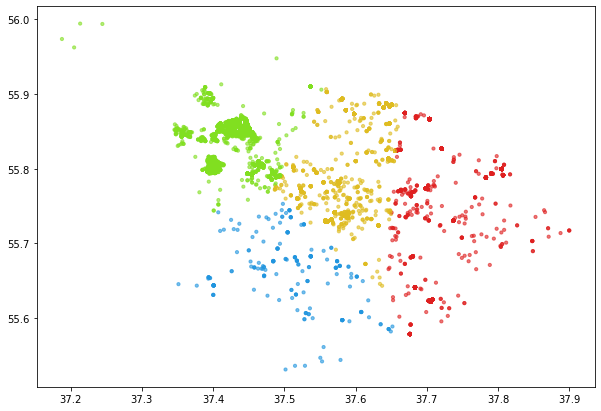

In [92]:
plt.figure(figsize=(10,7))
plt.scatter(data_yes.x, data_yes.y, c=data_yes.c, alpha = 0.6, s=10)

##### респоденты ответили НЕТ

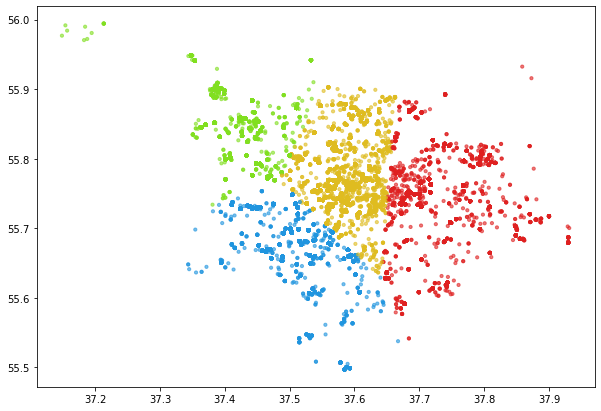

In [93]:
plt.figure(figsize=(10,7))
plt.scatter(data_no.x, data_no.y, c=data_no.c, alpha = 0.6, s=10)

Text(0.5, 1.0, 'ответили ДА')

<Figure size 1080x720 with 0 Axes>

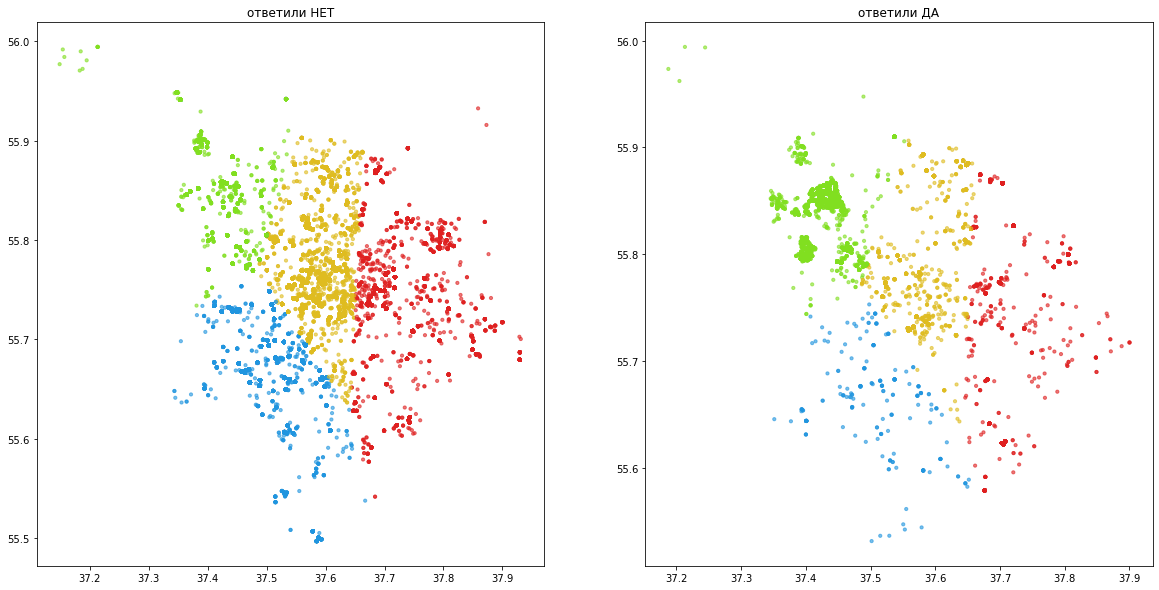

In [103]:
plt.figure(figsize=(15, 10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.scatter(data_no.x, data_no.y, c=data_no.c, alpha = 0.6, s=10)
ax2.scatter(data_yes.x, data_yes.y, c=data_yes.c, alpha = 0.6, s=10)
ax1.set_title('ответили НЕТ')
ax2.set_title('ответили ДА')